In [ ]:
from tensorflow import keras
print('keras: ', keras.__version__)

keras:  2.12.0


**Load Data**

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Label	Description:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

https://github.com/zalandoresearch/fashion-mnist


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

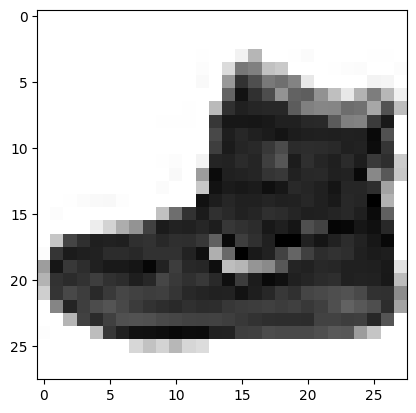

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
28*28

784

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
print(train_labels.shape)

(60000,)


In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Let's have a look at the test data:

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
print(test_labels)
print(len(test_labels))

[9 2 1 ... 8 1 5]
10000


**Data Preprocessing**


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [ ]:
x_train = train_images.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = test_images.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

In [ ]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

We also need to categorically encode the labels:

In [ ]:
train_labels[0]

9

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

**Build the Model**

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________



To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly
classified).

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

**Train the Model**

In [ ]:
network.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.5580 - acc: 0.8018
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.3872 - acc: 0.8579
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.3413 - acc: 0.8743
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3139 - acc: 0.8853
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2945 - acc: 0.8900
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2790 - acc: 0.8972
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2657 - acc: 0.9007
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2539 - acc: 0.9067
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2438 - acc: 0.9084
Epoch 10/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2341 - acc: 0.9128


**Evaluate the Model**

Now let's check that our model performs well on the test set too:

In [ ]:
test_loss, test_acc = network.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.3347 - acc: 0.8881 - 1s/epoch - 3ms/step


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.8881000280380249


**Apply the Model**

Pick a test image by choosing index number and take a look at how the model make the prediction.

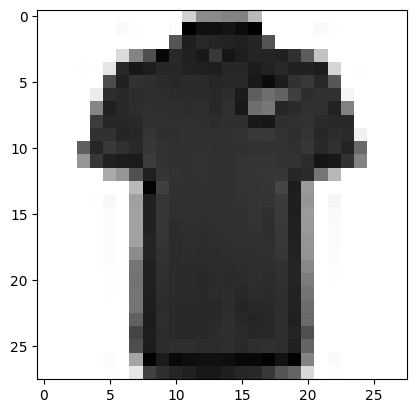

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

index = 908 # 0 to 9999
plt.imshow(test_images[index], cmap=plt.cm.binary)
plt.show()

In [ ]:
pred = network.predict(x_test[index].reshape(1,28*28,))
print('the prediction is: ', pred.argmax())
print('detailed probability distribution: \n', pred)

1/1 [==============================] - 0s 84ms/step
the prediction is:  0
detailed probability distribution: 
 [[8.5517341e-01 5.3034091e-07 4.3792409e-04 5.6344148e-04 1.8505950e-04
  1.8728732e-10 1.4357398e-01 5.5854112e-09 6.5644999e-05 1.6301944e-09]]


Label	Description:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot